# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [13]:
from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [14]:
np.random.seed(42)
    
df = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [15]:
df

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21
...,...,...
9995,25.204408,22
9996,12.006620,24
9997,17.178733,17
9998,21.983062,23


In [16]:
# dimensões do dataframe
df.shape

(10000, 2)

In [17]:
# tipos de dados
df.dtypes.unique()

array([dtype('float64'), dtype('int64')], dtype=object)

In [18]:
# colunas
df.columns

Index(['normal', 'binomial'], dtype='object')

## Distribuição Normal

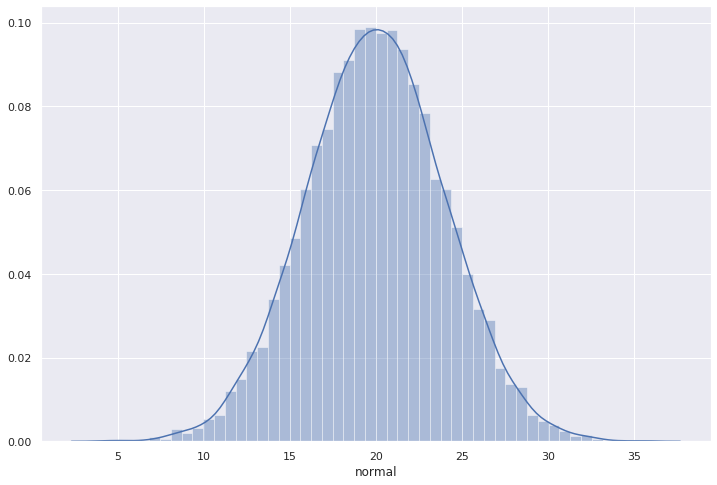

In [20]:
# verificar o grafico da distribuição normal
sns.distplot(df.normal);

In [21]:
# distribuição normal
media_norm = df.normal.mean()
mediana_norm = df.normal.median()
std_norm = df.normal.std()
var_norm = df.normal.std()

print(f'Mediana: {mediana_norm}')
print(f'Media: {media_norm}')
print(f'Desvio padrão: {std_norm}')
print(f'Variancia: {var_norm}')

Mediana: 19.98962009682849
Media: 19.991456066526293
Desvio padrão: 4.013849522013614
Variancia: 4.013849522013614


Podemos encontrar $P(X \leq 20)$ com a função `cdf()`:

In [22]:
sct.norm.cdf(20, loc=media_norm , scale=std_norm)

0.50084919320241

Obviamente, como a distribuição é normal é simétrica em torno da média $\mu$, a probabilidade de $X$ assumir um valor menor ou igual à média deve ser 0.5 (50%), ou seja, $P(X \leq \mu) = 0.5$:

In [23]:
sct.norm.cdf(media_norm, loc=media_norm , scale=std_norm)

0.5

Podemos utilizar a função `cdf()` em conjunto com a função `linspace()` do NumPy para gerar um gráfico da CDF:

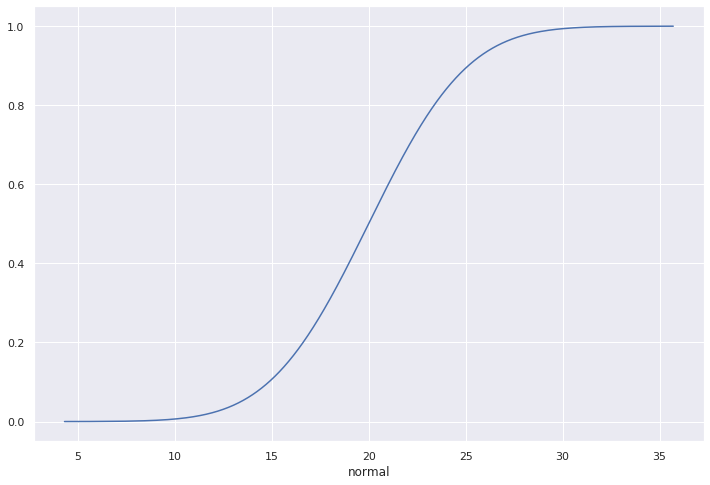

In [24]:
f = lambda x: sct.norm.cdf(df.normal, loc=media_norm , scale=std_norm)

cdf = f(df.normal)

sns.lineplot(df.normal, cdf);

Às vezes, estamos interessados no complemento da CDF, ou seja, na probabilidade a partir da outra ponta da distribuição. Para isso, usamos a função `sf()`. Por exemplo, utilizamos essa função para achar $P(X \geq 18)$:

In [25]:
sct.norm.sf(18, loc=media_norm , scale=std_norm)

0.6901043565917654

Note como esse valor é o complemento da probabilidade encontrado acima com a CDF.

Por fim, podemos querer saber o valor da função densidade de probabilidade, $f(x)$ , em determinado ponto. Apesar de não ser tão útil normalmente (por __não__ ser representar uma probabilidade), ela pode ter seus usos. Para isso, utilizamos a função `pdf()`. Para acharmos $f(18)$:

In [26]:
sct.norm.pdf(18, loc=media_norm , scale=std_norm)

0.08788116230596704

Na distribuição normal, a função $f(x)$ assume seu valor máximo na média:

In [27]:
sct.norm.pdf(media_norm, loc=media_norm , scale=std_norm)

0.09939143911934613

Como fizemos com a CDF, podemos utilizar a função `linspace()` para gerar o gráfico da pdf:

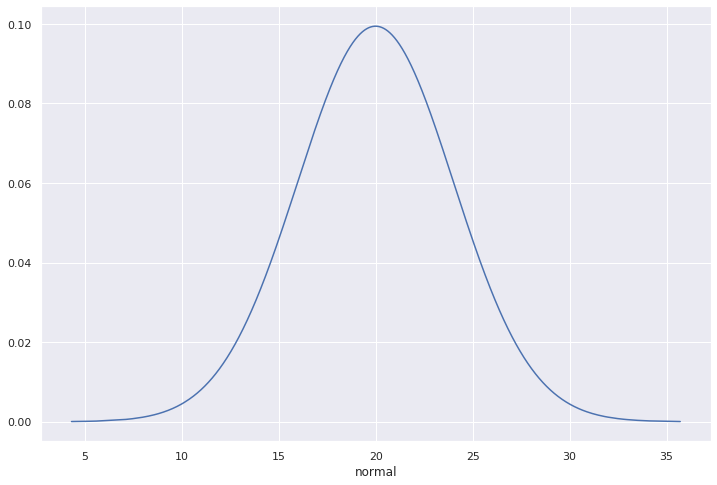

In [28]:
f = lambda x: sct.norm.pdf(df.normal, loc=media_norm , scale=std_norm)

pdf = f(df.normal)

sns.lineplot(df.normal, pdf);

Também pode ser útil encontrar o quantil para determinada probabilidade (acumulada a partir da cauda à esquerda). Por exemplo, podemos nos perguntar qual o valor de $X$ que acumula 25% da probabilidade, ou seja, qual valor de $x$ tal que $P(X \leq x) = 0.25$? Respondemos esse tipo de pergunta com a função `ppf()`:

In [29]:
q1_norm = sct.norm.ppf(0.25, loc=media_norm , scale=std_norm) # primeiro quartil
print(q1_norm)

17.28415570509867


Se quiséssemos o saber o quantil para a probabilidade acumulada a partir da cauda à direita, usaríamos a função `isf()`. Por exemplo, se quisermos encontrar $x$ tal que $P(X \geq x) = 0.25$:

In [30]:
q2_norm = sct.norm.isf(0.50, loc=media_norm , scale=std_norm) # segundo quartil
print(q2_norm)

19.991456066526293


In [31]:
q3_norm = sct.norm.isf(0.25, loc=media_norm , scale=std_norm) # terceiro qaurtil
print(q3_norm)

22.698756427953917


In [32]:
#intervalo interquartil da normal
irq_norm = q3_norm - q1_norm
print(irq_norm)

5.414600722855248


In [33]:
# Resumindo
df.normal.describe()

count    10000.000000
mean        19.991456
std          4.013850
min          4.310399
25%         17.309638
50%         19.989620
75%         22.684324
max         35.704951
Name: normal, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7efc0f1b7050>,
 'caps': [<matplotlib.lines.Line2D at 0x7efc0f1d3dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efc0f1b7450>],
 'medians': [<matplotlib.lines.Line2D at 0x7efc0f1e41d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7efc0f259a50>],
 'means': []}

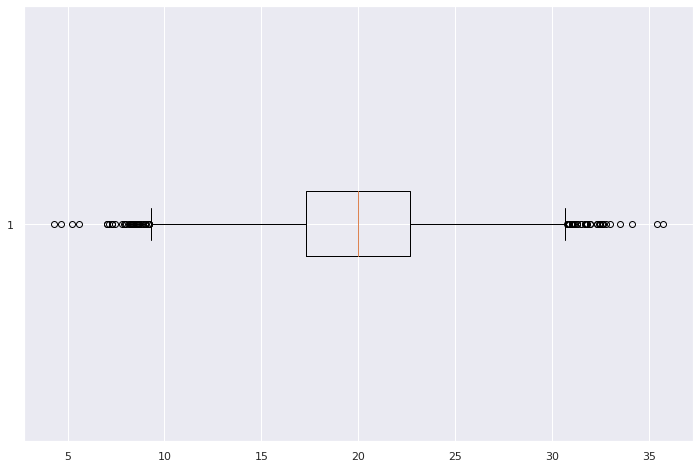

In [34]:
plt.boxplot(df.normal, vert = False)

## Distribuição Binomial

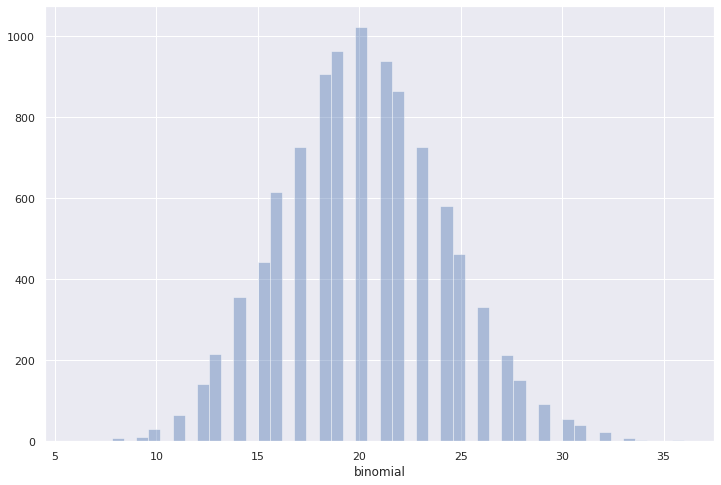

In [35]:
sns.distplot(df.binomial, kde = False);

In [36]:
df.columns

Index(['normal', 'binomial'], dtype='object')

In [37]:
binomial = df.binomial
media_binom = binomial.mean()
std_binom = binomial.std()

In [38]:
binomial.describe()

count    10000.000000
mean        20.097000
std          4.041191
min          6.000000
25%         17.000000
50%         20.000000
75%         23.000000
max         36.000000
Name: binomial, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7efc0f5ab7d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7efc0f5a2ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efc0f5ab790>],
 'medians': [<matplotlib.lines.Line2D at 0x7efc0f5bf950>],
 'fliers': [<matplotlib.lines.Line2D at 0x7efc0f5bfe50>],
 'means': []}

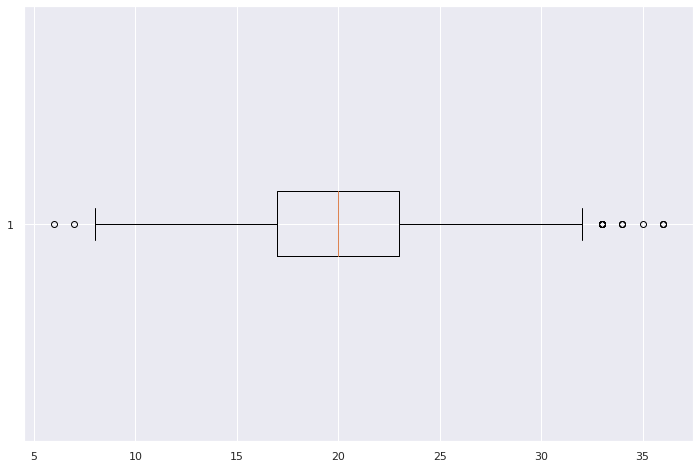

In [39]:
plt.boxplot(df.binomial, vert = False)

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` do `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [40]:
def q1():
    norm = np.quantile(df['normal'], [0.25, 0.50, 0.75]) 
    binom = np.quantile(df['binomial'], [0.25, 0.50, 0.75]) 
    return tuple(np.round(norm - binom, 3))

In [41]:
q1()

(0.31, -0.01, -0.316)

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda com um único escalar arredondado para três casas decimais.

In [42]:
def q2():
    cauda_inf = df.normal.mean() - df.normal.std()
    cauda_sup = df.normal.mean() + df.normal.std()
    
    prob_inf = sct.norm.cdf(cauda_inf,loc = 20, scale = 4)
    prob_sup = sct.norm.cdf(cauda_sup,loc = 20, scale = 4)
    
    return round((prob_sup - prob_inf),3)

In [43]:
q2()

0.684

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [44]:
def q3():
    dif_m = round((df.binomial.mean() - df.normal.mean()),3) # diferencia media
    dif_v = round((df.binomial.var() - df.normal.var()),3) # diferencia variancia
    return (dif_m, dif_v)

In [45]:
q3()

(0.106, 0.22)

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [46]:
stars = pd.read_csv("pulsar_stars.csv")

features = ["mean_profile", "sd_profile", "kurt_profile", "skew_profile",
            "mean_curve", "sd_curve", "kurt_curve","skew_curve","target"]

stars.rename({old_name: new_name for (old_name, new_name) in zip(stars.columns,features)}, axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [47]:
# colunas
stars.columns

Index(['mean_profile', 'sd_profile', 'kurt_profile', 'skew_profile',
       'mean_curve', 'sd_curve', 'kurt_curve', 'skew_curve', 'target'],
      dtype='object')

In [48]:
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mean_profile  17897 non-null  float64
 1   sd_profile    17897 non-null  float64
 2   kurt_profile  17897 non-null  float64
 3   skew_profile  17897 non-null  float64
 4   mean_curve    17897 non-null  float64
 5   sd_curve      17897 non-null  float64
 6   kurt_curve    17897 non-null  float64
 7   skew_curve    17897 non-null  float64
 8   target        17897 non-null  bool   
dtypes: bool(1), float64(8)
memory usage: 1.1 MB


In [49]:
stars.shape

(17897, 9)

Bom como podemos ver nos dados padronizado, a media é igual a -2,5. Ai voce deve estar se perguntando, não deveria ser zero, assim como a variação é igual 1? BOm este valor de -2,5 padronizado equivale a zero. Melhor forma de entender é através do grafico que plotamos anteriormente 

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [50]:
def q4():
    filtrado = stars[stars.target == False].mean_profile
    padronizado = (filtrado - filtrado.mean())/filtrado.std()
    ecdf = ECDF(padronizado)
    quantis = sct.norm.ppf([0.80,0.90,0.95], loc = 0, scale = 1)
    return tuple(np.around(ecdf(quantis),3))

In [51]:
q4()

(0.806, 0.911, 0.959)

In [52]:
filtrado = stars[stars.target == False].mean_profile

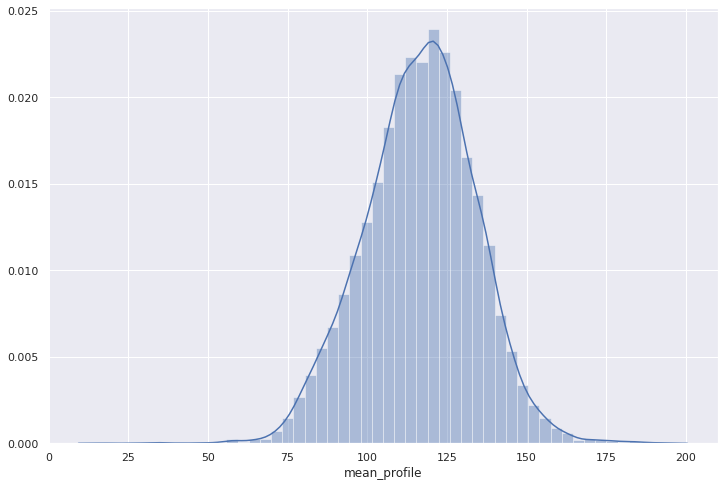

In [53]:
sns.distplot(filtrado)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [54]:
def q5():
    filtrado = stars[stars.target == False].mean_profile
    padronizado = (filtrado - filtrado.mean())/filtrado.std()
    quartis_do_df = np.quantile(padronizado, [0.25, 0.50, 0.75])
    quartis_teoricos = sct.norm.ppf([0.25, 0.50, 0.75], loc=0, scale= 1)
    return tuple(np.around(quartis_do_df - quartis_teoricos,3))

In [55]:
q5()

(0.027, 0.04, -0.004)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.